In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [4]:
# read mean rewards csv exported from tensorboard
mr_LSTM_1 = pd.read_csv('data/mean_rewards/run-LSTM_env_PPO_LSTM_t2_1-tag-rollout_ep_rew_mean.csv')
mr_LSTM_1.head()
mr_LSTM_1["category"] = "LSTM VS Kyo Kusanagi"
print(mr_LSTM_1.shape)
mr_LSTM_2 = pd.read_csv('data/mean_rewards/run-LSTM_env_PPO_LSTM_t3_1-tag-rollout_ep_rew_mean.csv')
mr_LSTM_2["category"] = "LSTM VS Kyo Kusanagi V1"
mr_LSTM_2.head()
print(mr_LSTM_2.shape)

mr_LSTM_3 = pd.read_csv('data/mean_rewards/run-LSTM_env_PPO_LSTM_t4_1-tag-rollout_ep_rew_mean.csv')
mr_LSTM_3["category"] = "LSTM VS Kyo Kusanagi V2"
mr_LSTM_3.head()
print(mr_LSTM_3.shape)

mr_CNN_CH0 = pd.read_csv('data/mean_rewards/run-V2_env_PPO_V2_t3_2-tag-rollout_ep_rew_mean.csv')
mr_CNN_CH0.head()
mr_CNN_CH0["category"] = "Multi-CNN VS Kyo Kusanagi"
print(mr_CNN_CH0.shape)

mr_CNN_trans_CH2 = pd.read_csv('data/mean_rewards/run-V2_env_PPO_V2_t3_transfer_CH2_1-tag-rollout_ep_rew_mean.csv')
mr_CNN_trans_CH2.head()
print(mr_CNN_trans_CH2.shape)
mr_CNN_trans_CH2_continue = pd.read_csv('data/mean_rewards/run-V2_env_PPO_V2_t3_transfer_CH2_1_0-tag-rollout_ep_rew_mean.csv')
mr_CNN_trans_CH2_continue.head()
print(mr_CNN_trans_CH2_continue.shape)

mr_CNN_trans_CH2_continue.head()
mr_CNN_trans_CH2_ALL = pd.concat([mr_CNN_trans_CH2,mr_CNN_trans_CH2_continue],axis=0)
mr_CNN_trans_CH2_ALL["category"] = "Multi-CNN VS Goro Daimon"
print(mr_CNN_trans_CH2_ALL.shape)

mr_CNN_trans_CH16 = pd.read_csv('data/mean_rewards/run-V2_env_PPO_V2_t3_transfer_CH16_1-tag-rollout_ep_rew_mean.csv')
mr_CNN_trans_CH16.head()
mr_CNN_trans_CH16["category"] = "Multi-CNN VS Mai Shiranui"
print(mr_CNN_trans_CH16.shape)

mr_CNN_trans_CH26 = pd.read_csv('data/mean_rewards/run-V2_env_PPO_V2_t3_transfer_CH26_1-tag-rollout_ep_rew_mean.csv')
mr_CNN_trans_CH26["category"] = "Multi-CNN VS Billy"

print(mr_CNN_trans_CH26.shape)
mr_CNN_trans_CH26.head()

mr_LSTM_l1_768 = pd.read_csv('data/LSTM_mean_reward/run-LSTM_env_Kof97_PPO_LSTM_layer1_768_1-tag-rollout_ep_rew_mean.csv')
mr_LSTM_l1_768["category"] = "LSTM VS Kyo Kusanagi(1 layer 768 units)"
mr_LSTM_l1_768.head()
print(mr_LSTM_l1_768.shape)

(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(814, 3)
(407, 3)
(1221, 4)
(1000, 4)
(1000, 4)
(1000, 4)


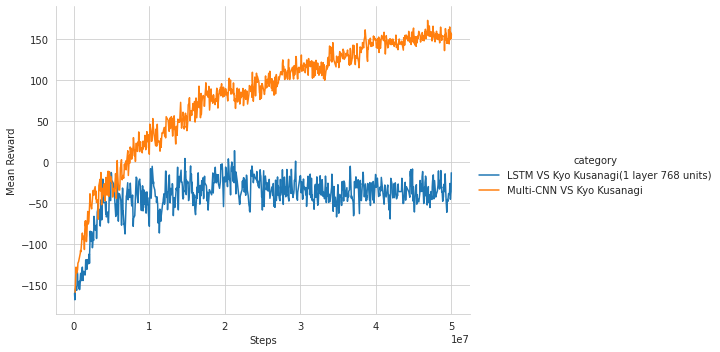

In [5]:


CNN_VS_LSTM = pd.concat([mr_LSTM_l1_768,mr_CNN_CH0],axis=0)
CNN_VS_LSTM = CNN_VS_LSTM.reset_index()
CNN_VS_LSTM_plt= sns.relplot(x="Step", y="Value", hue="category",
            kind="line", data=CNN_VS_LSTM, aspect=11.7/8.27);

CNN_VS_LSTM_plt.set_xlabels("Steps", clear_inner=False)
CNN_VS_LSTM_plt.set_ylabels("Mean Reward", clear_inner=False)
fig = CNN_VS_LSTM_plt.figure
#fig.set_size_inches(11.7, 8.27)
fig.savefig("images/CNN_VS_LSTM_plt.png")

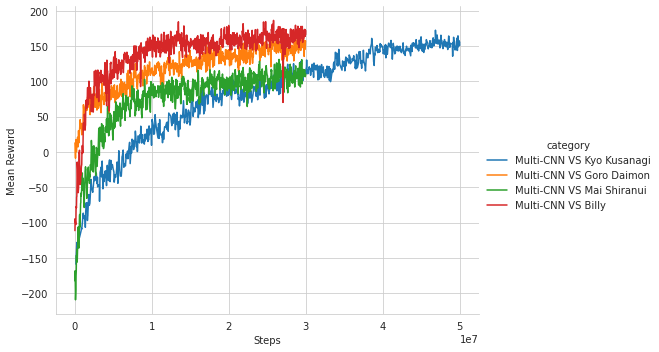

In [28]:
Multi_CNN = pd.concat([mr_CNN_CH0,mr_CNN_trans_CH2_ALL,mr_CNN_trans_CH16,mr_CNN_trans_CH26],axis=0)
Multi_CNN = Multi_CNN.reset_index()
Multi_CNN_plt= sns.relplot(x="Step", y="Value", hue="category",
            kind="line", data=Multi_CNN, aspect=11.7/8.27);
Multi_CNN_plt.set_xlabels("Steps", clear_inner=False)
Multi_CNN_plt.set_ylabels("Mean Reward", clear_inner=False)
fig = Multi_CNN_plt.figure
fig.savefig("images/Multi_CNN_plt.png")

In [31]:
static_info = pd.read_csv('data/static_info_df.csv')
static_info.head()


,Unnamed: 0,category,episode,WinLoss,Time,Health
0,0,Multi-CNN VS Kyo Kusanagi,0,WIN,50,91
1,1,Multi-CNN VS Kyo Kusanagi,1,WIN,49,103
2,2,Multi-CNN VS Kyo Kusanagi,2,WIN,46,91
3,3,Multi-CNN VS Kyo Kusanagi,3,WIN,47,103
4,4,Multi-CNN VS Kyo Kusanagi,4,WIN,47,103


In [32]:

static_info = static_info[static_info['category'] !="LSTM VS Kyo Kusanagi"]
static_info.loc[static_info['category'] =="LSTM VS Kyo Kusanagi 786 units", "category"] = "LSTM VS Kyo Kusanagi"
static_info.loc[static_info['Health'] <0, "Health"] = 0
static_info.groupby("category")["WinLoss"].value_counts()

category                   WinLoss
LSTM VS Kyo Kusanagi       LOSE       27
                           WIN        23
Multi-CNN VS Billy         WIN        50
Multi-CNN VS Goro Daimon   WIN        50
Multi-CNN VS Kyo Kusanagi  WIN        50
Multi-CNN VS Mai Shiranui  WIN        50
Random Agent               LOSE       41
                           WIN         9
Name: WinLoss, dtype: int64

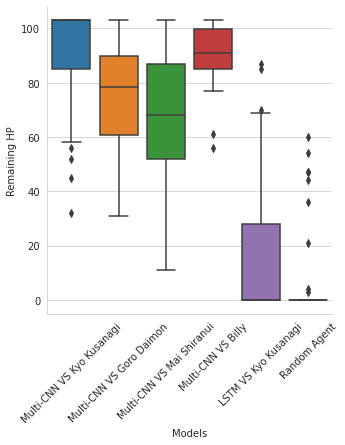

In [33]:
health_plt = sns.catplot(x="category", y="Health", kind="box", data=static_info,order=["Multi-CNN VS Kyo Kusanagi","Multi-CNN VS Goro Daimon","Multi-CNN VS Mai Shiranui","Multi-CNN VS Billy","LSTM VS Kyo Kusanagi","Random Agent"])
health_plt.set_ylabels("Remaining HP", clear_inner=False)
health_plt.set_xlabels("Models", clear_inner=False)
plt.xticks(rotation=45)
fig = health_plt.figure
fig.savefig("images/health_plt.png")

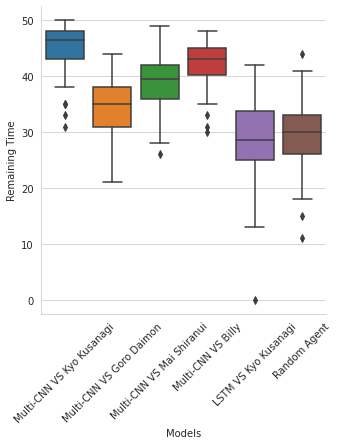

In [26]:
time_plt=sns.catplot(x="category", y="Time", kind="box", data=static_info, order=["Multi-CNN VS Kyo Kusanagi","Multi-CNN VS Goro Daimon","Multi-CNN VS Mai Shiranui","Multi-CNN VS Billy","LSTM VS Kyo Kusanagi","Random Agent"])
time_plt.set_ylabels("Remaining Time", clear_inner=False)
time_plt.set_xlabels("Models", clear_inner=False)
plt.xticks(rotation=45)
fig = health_plt.figure
fig.savefig("images/time_plt.png")

In [24]:
combos = pd.read_csv('data/combo_df.csv')
combos = combos[combos['category'] !="LSTM VS Kyo Kusanagi"]
combos.loc[combos['category'] =="LSTM VS Kyo Kusanagi 786 units", "category"] = "LSTM VS Kyo Kusanagi"
combos=combos.rename(columns={"category": "model"})
combos.head()

,Unnamed: 0,model,combo,count
0,0,Multi-CNN VS Kyo Kusanagi,2,61
1,1,Multi-CNN VS Kyo Kusanagi,3,78
2,2,Multi-CNN VS Kyo Kusanagi,4,0
3,3,Multi-CNN VS Kyo Kusanagi,5,0
4,4,Multi-CNN VS Kyo Kusanagi,6,0


/home/duhuaiyu/anaconda3/envs/torch37cuda11/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


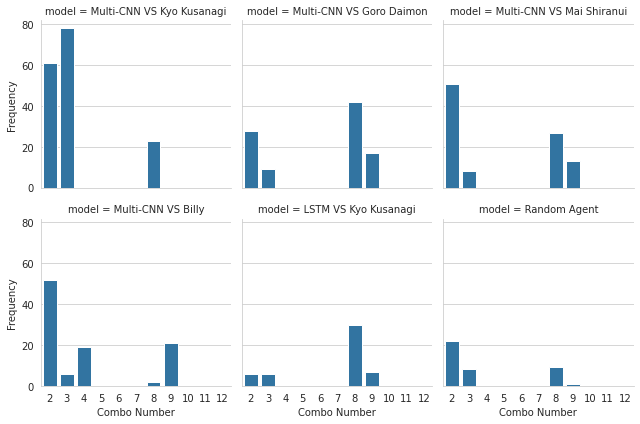

In [34]:
g = sns.FacetGrid(combos, col="model",col_wrap=3,col_order=["Multi-CNN VS Kyo Kusanagi","Multi-CNN VS Goro Daimon","Multi-CNN VS Mai Shiranui","Multi-CNN VS Billy","LSTM VS Kyo Kusanagi","Random Agent"])
combo_plt=g.map(sns.barplot, "combo", "count")
g.set_axis_labels("Combo Number","Frequency")
fig = combo_plt.figure
fig.savefig("images/combo_plt.png")

In [14]:
acts = pd.read_csv('data/ACT_df.csv')
acts.head()

,Unnamed: 0,category,ACT,count
0,0,Multi-CNN VS Kyo Kusanagi,0,370.0
1,1,Multi-CNN VS Kyo Kusanagi,1,789.0
2,2,Multi-CNN VS Kyo Kusanagi,2,3.0
3,3,Multi-CNN VS Kyo Kusanagi,3,0.0
4,4,Multi-CNN VS Kyo Kusanagi,4,0.0


In [16]:
acts = pd.read_csv('data/ACT_df.csv')
raw_acts = pd.DataFrame(columns=["model","ACT"])
for index, row in acts.iterrows():
    #print(index)
    new_rows = [[row["category"],row["ACT"]] for i in range(0,row["count"])]
    if len(new_rows)>0:
        #print(new_rows)
        raw_acts = raw_acts.append(pd.DataFrame(new_rows, columns=raw_acts.columns),ignore_index=True)
raw_acts.to_csv("data/raw_act.csv")
# res= acts.groupby('category').apply(lambda x : x.sort_values(by = 'count', ascending = False).head(10).reset_index(drop = True))
# #print(res)
#
# order = res['ACT'].drop_duplicates()
# s = set(order)
# print(acts["ACT"] == '1')
# acts_filtered = acts[acts["ACT"] in s]
# g = sns.FacetGrid(acts_filtered, col="category",col_wrap=3)
# act_bar = g.map(sns.barplot, "ACT","count",order=acts_filtered)

# fig = act_bar.figure
# fig.savefig("images/act_bar.png")


#ax = acts[acts['category']== 'Multi CNN VS Kyo Kusanagi'].plot.bar(x='ACT', y='count', figsize=(200, 8))
# ax = acts[acts['category']== 'Multi CNN VS Kyo Kusanagi'].plot.bar(x='ACT', y='count', figsize=(100, 8))
#sns.barplot("ACT","count",data=acts[acts['category']== 'LSTM VS Kyo Kusanagi'])
# from matplotlib.pyplot import *
# f_data = acts[acts['category']== 'Multi CNN VS Kyo Kusanagi']
# x = f_data['ACT']
# y = f_data['count']
# line(x,y)
# show()


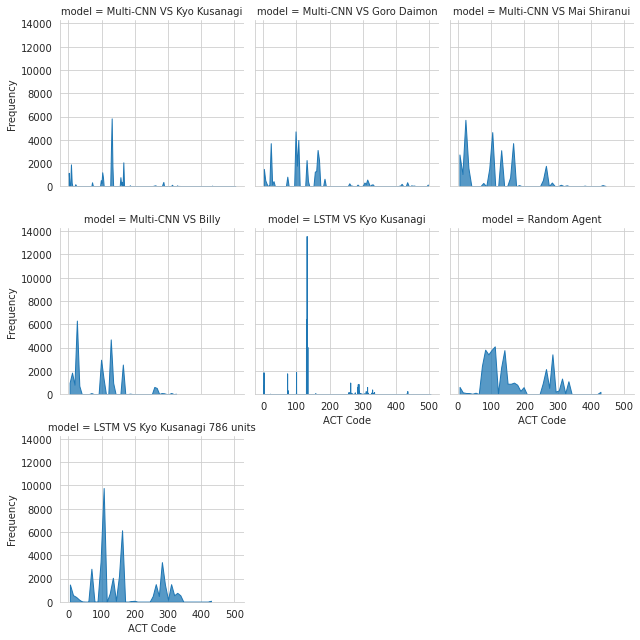

In [17]:
raw_acts = pd.read_csv('data/raw_act.csv')
#print(raw_acts.head(10000))
#sns.histplot(data=raw_acts, x="ACT",hue="model",element="poly")
# plt.ylim(0, 16000)
g = sns.FacetGrid(raw_acts, col="model",col_wrap=3)

act_plt=g.map(sns.histplot, "ACT", element="poly")
g.set_axis_labels("ACT Code","Frequency")
fig = act_plt.figure
fig.savefig("images/act_plt.png")

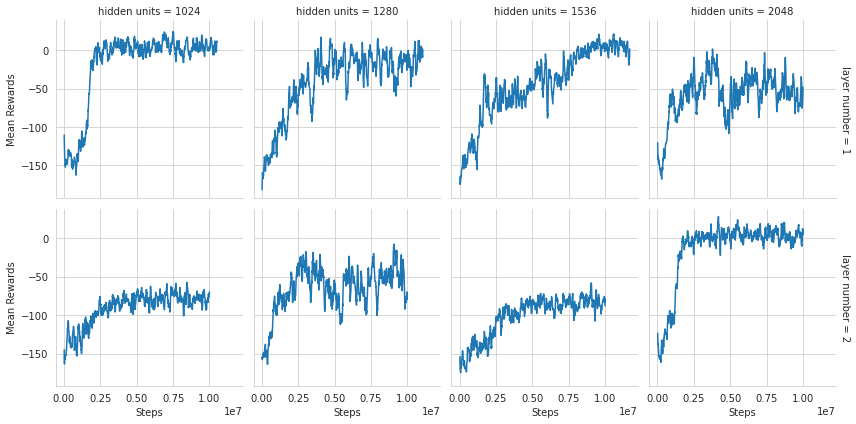

In [2]:
dfs = []
for layer in [1,2]:
    for units in [1024,1280,1536,2048]:
        df = pd.read_csv(f'data/LSTM_mean_reward/run-LSTM_env_Kof97_PPO_LSTM_layer{layer}_{units}_1-tag-rollout_ep_rew_mean.csv')
        df.head()
        df["layer number"] = layer
        df["hidden units"] = units
        dfs.append(df)

all_LSTM_df = pd.concat(dfs)
all_LSTM_df.head()
g = sns.FacetGrid(all_LSTM_df, row="layer number", col="hidden units", margin_titles=True)
# Multi_CNN_plt= sns.relplot(x="Step", y="Value", hue="category",
#             kind="line", data=Multi_CNN, aspect=11.7/8.27);
LSTM_RW=g.map(sns.lineplot, "Step", "Value")
g.set_axis_labels("Steps","Mean Rewards")
fig = LSTM_RW.figure
fig.savefig("images/LSTM_RW.png")